In [4]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
# %run ../src/acc_df.py
# Ac = Acc_data('../data/cleaned/coll_coord.csv')
# acc = Ac.get_all_coll() #['']

### 1. Turn it into a time series of weeks

In [6]:
week_numbers = pd.read_csv('../../data/cleaned/weekseries_05_18.csv')

In [7]:
week_numbers.head(2),week_numbers.tail(2)

(           ds  acc_nr
 0  2005-01-02     275
 1  2005-01-09     308,              ds  acc_nr
 729  2018-12-23     234
 730  2018-12-30     150)

In [8]:
acc_nr_bw = week_numbers.acc_nr.values #[:100]

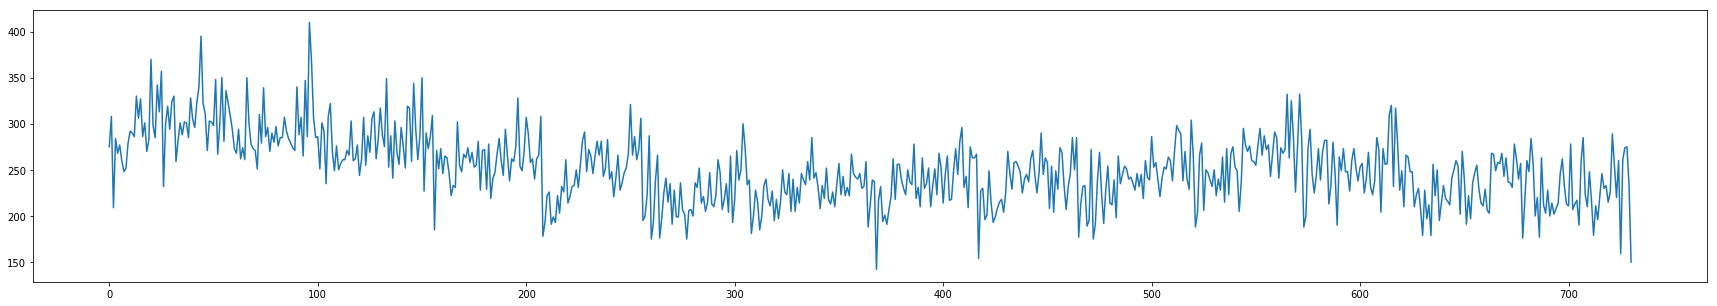

In [9]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(week_numbers.index.values, acc_nr_bw)

#### Windowize and split

In [10]:
def windowize_data(data, n_prev):
    n_predictions = len(data) - n_prev
    y = data[n_prev:]
    # this might be too clever
    indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[indices, None]
    return x, y

In [11]:
# windowize_data(week_numbers.index.values,20)

In [12]:
def split_and_windowize(data, n_prev, fraction_test=0.3):
    n_predictions = len(data) - 2*n_prev
    
    n_test  = int(fraction_test * n_predictions)
    n_train = n_predictions - n_test   
    
    x_train, y_train = windowize_data(data[:n_train], n_prev)
    x_test, y_test = windowize_data(data[n_train:], n_prev)
    return x_train, x_test, y_train, y_test

In [13]:
n_prev = 200
x_train, x_test, y_train, y_test = split_and_windowize(acc_nr_bw,n_prev,fraction_test=0.1)

#### Model

In [15]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

### Train

In [16]:
model.fit(x_train, y_train, batch_size=32, epochs=10000)

Train on 98 samples
Epoch 1/10000
98/98 [==============================] - 5s 48ms/sample - loss: 56819.3107
Epoch 2/10000
98/98 [==============================] - 1s 10ms/sample - loss: 55820.9252
Epoch 3/10000
98/98 [==============================] - 1s 10ms/sample - loss: 54892.5104
Epoch 4/10000
98/98 [==============================] - 1s 10ms/sample - loss: 54395.1665
Epoch 5/10000
98/98 [==============================] - 1s 10ms/sample - loss: 54078.3442
Epoch 6/10000
98/98 [==============================] - 1s 10ms/sample - loss: 53845.8278
Epoch 7/10000
98/98 [==============================] - 1s 10ms/sample - loss: 53677.7280
Epoch 8/10000
98/98 [==============================] - 1s 10ms/sample - loss: 53529.2953
Epoch 9/10000
98/98 [==============================] - 1s 10ms/sample - loss: 53402.8823
Epoch 10/10000
98/98 [==============================] - 1s 10ms/sample - loss: 53297.7130
Epoch 11/10000
98/98 [==============================] - 1s 10ms/sample - loss: 53199.3964

In [17]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[235.9398],
       [235.9398],
       [235.9398],
       [235.9398],
       [235.9398]], dtype=float32)

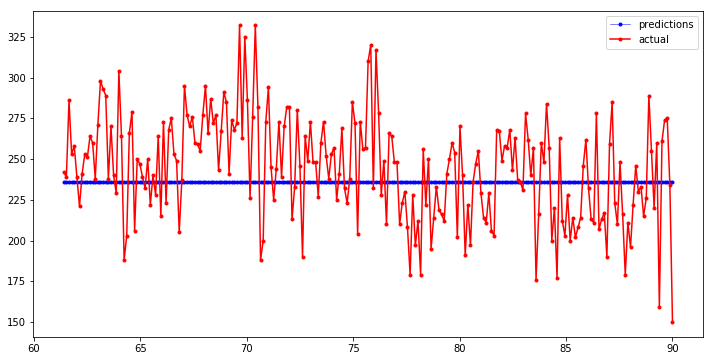

In [18]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

#### next try

In [17]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=1000)

Train on 428 samples
Epoch 1/1000
428/428 [==============================] - 4s 10ms/sample - loss: 62454.2150
Epoch 2/1000
428/428 [==============================] - 1s 3ms/sample - loss: 60661.2888
Epoch 3/1000
428/428 [==============================] - 1s 3ms/sample - loss: 59993.5739
Epoch 4/1000
428/428 [==============================] - 1s 3ms/sample - loss: 59575.9855
Epoch 5/1000
428/428 [==============================] - 1s 3ms/sample - loss: 59256.7818
Epoch 6/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58984.8113
Epoch 7/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58733.3408
Epoch 8/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58495.8727
Epoch 9/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58265.2848
Epoch 10/1000
428/428 [==============================] - 1s 3ms/sample - loss: 58038.8558
Epoch 11/1000
428/428 [==============================] - 1s 3ms/sample - loss: 57815.93

In [18]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[249.86105],
       [249.86105],
       [249.86105],
       [249.86105],
       [249.86105]], dtype=float32)

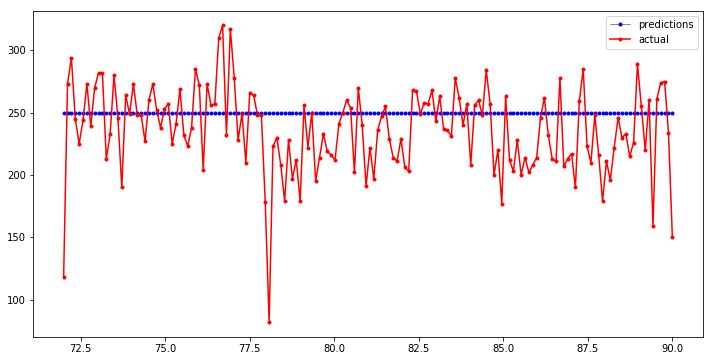

In [19]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()